<a href="https://colab.research.google.com/github/deepnmr/ESTP/blob/main/fid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# mount the google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# install the nmrglue

!pip install nmrglue

     |████████████████████████████████| 218 kB 7.5 MB/s 


In [ ]:
import os
import pathlib
import matplotlib.pyplot as plt
import numpy as np
import nmrglue as ng

**Functions**
* oversampling_phase(uic) gives phase.
(mostly GRPDLY in acqus file. Otherwise, look the table using DSPFVS and DECIM.)

* truncate_FID(uic,data,datapoint) to make FID to desired size.
It returns truncated FID.

* processing(uic,data,datapoint) to process the fid.
It returns spectrum.

* making_data(exp_list, datapoint=2048) to generate all the data set.

In [ ]:
from deepnmr_utils import truncate_FID, processing, making_data, oversampling_phase

**make a list containing a experiment**

In [ ]:
# make list of experiment and processing data
exp_dir = pathlib.Path('/content/gdrive/MyDrive/DLdata')
exp_list = list(exp_dir.glob('*/*'))
#proc_list = list(exp_dir.glob('*/*/pdata/*'))

In [ ]:
exp_list

[PosixPath('/content/gdrive/MyDrive/DLdata/PRL3_24sep18/1'),
 PosixPath('/content/gdrive/MyDrive/DLdata/PRL3_19mar19/1'),
 PosixPath('/content/gdrive/MyDrive/DLdata/mdmx_CCR20dec17/1'),
 PosixPath('/content/gdrive/MyDrive/DLdata/comPRL3_24july18/1')]

**Checking a fid and the processed spectrum.**

For deep learning in TensorFlow, data collected for the input.

In [ ]:
fid_datas, proc_datas = making_data(exp_list,2048)

Optimization terminated successfully.
         Current function value: 0.000139
         Iterations: 132
         Function evaluations: 250
Optimization terminated successfully.
         Current function value: 0.000086
         Iterations: 139
         Function evaluations: 260
Optimization terminated successfully.
         Current function value: 0.011834
         Iterations: 98
         Function evaluations: 187
Optimization terminated successfully.
         Current function value: 0.000110
         Iterations: 124
         Function evaluations: 238


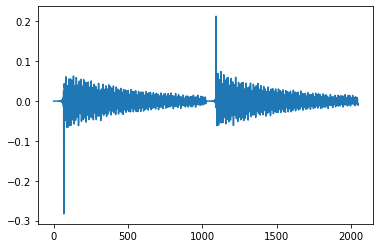

In [ ]:
plt.plot(fid_datas[3])

In [ ]:
def plot_data(fid_datas, proc_datas, start = 1, end = 1):
  n_rows = end - start + 1

  start = int(start-1)
  end = int(end)

  fid_datas = fid_datas[start:end]
  proc_datas = proc_datas[start:end]


  plt.figure(figsize = (12, n_rows*6))
  
  for row in range(n_rows):
    plt.subplot(n_rows,2, 2*row + 1)
    plt.plot(fid_datas[row])
    #plt.plot(fid_datas[row][1])
    
    plt.subplot(n_rows,2,2*row + 2)
    plt.plot(proc_datas[row])
    
  plt.show()

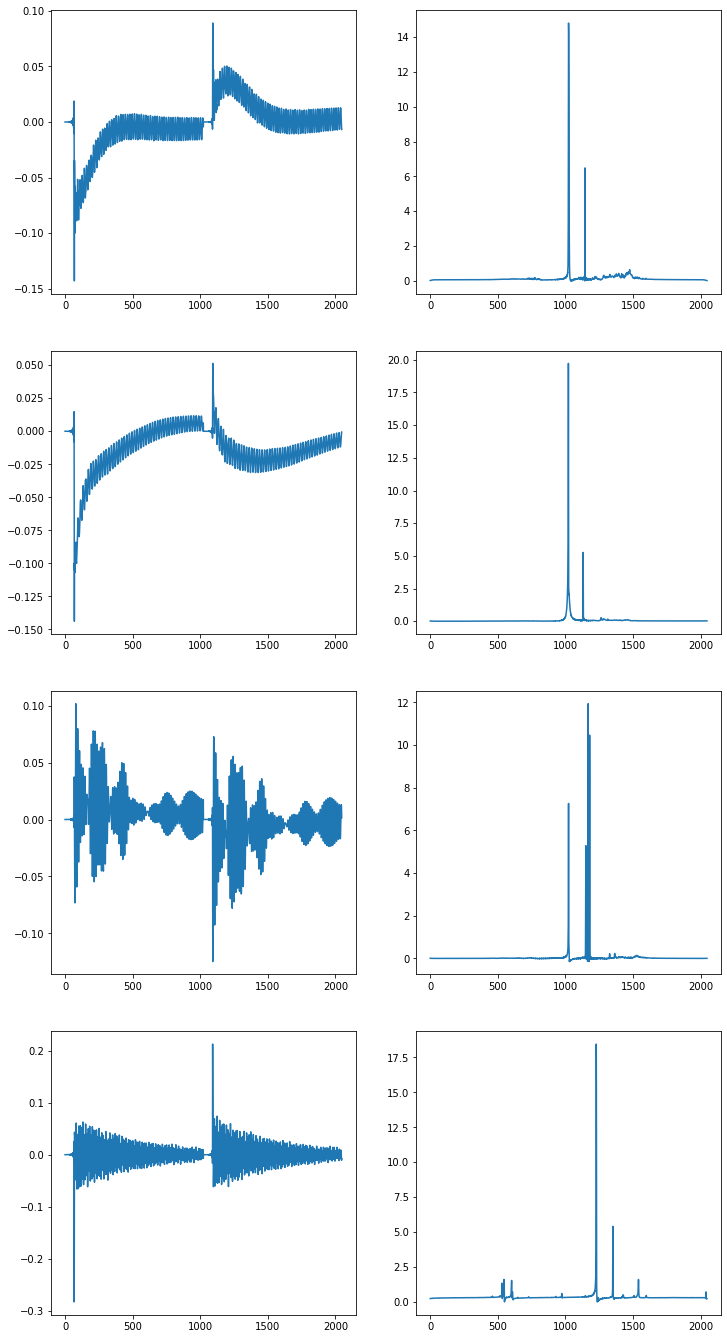

In [ ]:
plot_data(fid_datas, proc_datas, start=1, end=4)

**Data shape checking**

In [ ]:
fid_datas.shape, proc_datas.shape

((4, 2048), (4, 2048))

In [ ]:
fid_datas_real = fid_datas[:,:1024]
fid_datas_imag = fid_datas[:,1024:]

fid_datas_real.shape

(4, 1024)

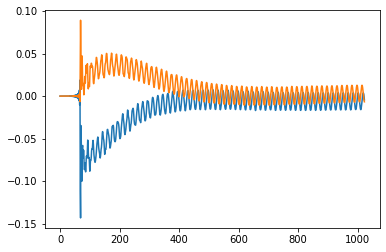

In [ ]:
plt.plot(fid_datas_real[0])
plt.plot(fid_datas_imag[0])

# Forecast
This part is for the forecast.

**Split the data into train and Valid**



In [ ]:
X_train, y_train = fid_datas_real[:2,:256], fid_datas_real[:2,256:512]
X_valid, y_valid = fid_datas_real[2:,:256], fid_datas_real[2:,256:512]

In [ ]:
X_train.shape,y_train.shape,X_valid.shape,y_valid.shape

((2, 256), (2, 256), (2, 256), (2, 256))

In [ ]:
y_train

array([[-0.02671063, -0.02197759, -0.01869569, -0.01534805, -0.01144234,
        -0.00889192, -0.00934821, -0.01212378, -0.016278  , -0.02108899,
        -0.02535318, -0.0279142 , -0.02861727, -0.02894987, -0.03030409,
        -0.03117946, -0.02863495, -0.02252685, -0.0165603 , -0.01324934,
        -0.01102301, -0.00819433, -0.00645824, -0.00767579, -0.01065798,
        -0.01354175, -0.01645673, -0.02004546, -0.02415852, -0.02750103,
        -0.02909649, -0.02870135, -0.02688516, -0.0240179 , -0.01976483,
        -0.01401716, -0.00848321, -0.00557637, -0.00567587, -0.00640781,
        -0.00626472, -0.0069465 , -0.01057537, -0.01601174, -0.01995421,
        -0.02169273, -0.02341876, -0.02547332, -0.02558507, -0.02290163,
        -0.01940668, -0.0164692 , -0.01297464, -0.00803471, -0.00345706,
        -0.00149561, -0.00170734, -0.00287153, -0.0046916 , -0.00812353,
        -0.01317806, -0.01825713, -0.02156349, -0.02239729, -0.02213115,
        -0.02192207, -0.02090238, -0.01737163, -0.0

In [ ]:
X_train = X_train[...,np.newaxis]
X_valid = X_valid[...,np.newaxis]

In [ ]:
X_train.shape, X_train[0].shape

((2, 256, 1), (256, 1))

## Deep Learning

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

## modeling building
Simple DNN

In [ ]:
keras.backend.clear_session()
np.random.seed(44)
tf.random.set_seed(44)

model = keras.models.Sequential()

model.add(layers.Input(shape=[256,]))
model.add(layers.Dense(20,activation='elu',
                       kernel_initializer='he_normal'))
model.add(layers.Dense(20,activation='elu',
                       kernel_initializer='he_normal'))
model.add(layers.Dense(20,activation='elu',
                       kernel_initializer='he_normal'))
model.add(layers.Dense(256))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                5140      
                                                                 
 dense_1 (Dense)             (None, 20)                420       
                                                                 
 dense_2 (Dense)             (None, 20)                420       
                                                                 
 dense_3 (Dense)             (None, 256)               5376      
                                                                 
Total params: 11,356
Trainable params: 11,356
Non-trainable params: 0
_________________________________________________________________


In [ ]:
optimizer = keras.optimizers.Adam()
loss = keras.losses.MeanSquaredError()

model.compile(loss=loss,optimizer=optimizer)


In [ ]:
callback_es = keras.callbacks.EarlyStopping(monitor='loss',patience=5)

In [ ]:
history = model.fit(X_train, y_train,
                    validation_data=(X_valid,y_valid),
                    callbacks=[callback_es],
                    epochs=200)

Epoch 1/200
1/1 [==============================] - 1s 867ms/step - loss: 8.7345e-04 - val_loss: 0.0012
Epoch 2/200
1/1 [==============================] - 0s 32ms/step - loss: 5.0392e-04 - val_loss: 0.0013
Epoch 3/200
1/1 [==============================] - 0s 30ms/step - loss: 3.6301e-04 - val_loss: 0.0013
Epoch 4/200
1/1 [==============================] - 0s 25ms/step - loss: 3.1681e-04 - val_loss: 0.0013
Epoch 5/200
1/1 [==============================] - 0s 33ms/step - loss: 3.1321e-04 - val_loss: 0.0013
Epoch 6/200
1/1 [==============================] - 0s 23ms/step - loss: 2.9927e-04 - val_loss: 0.0013
Epoch 7/200
1/1 [==============================] - 0s 29ms/step - loss: 2.6912e-04 - val_loss: 0.0013
Epoch 8/200
1/1 [==============================] - 0s 28ms/step - loss: 2.3840e-04 - val_loss: 0.0013
Epoch 9/200
1/1 [==============================] - 0s 27ms/step - loss: 2.1127e-04 - val_loss: 0.0013
Epoch 10/200
1/1 [==============================] - 0s 27ms/step - loss: 1.8579e-

Checking the forecast


In [ ]:
y_pred = model.predict(X_train)
y_pred.shape,y_train.shape

((2, 256), (2, 256))

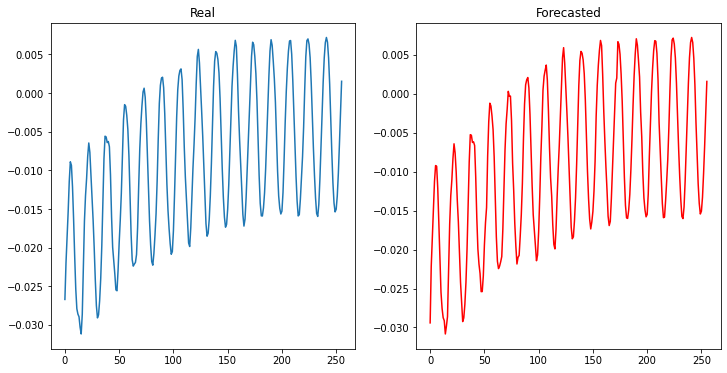

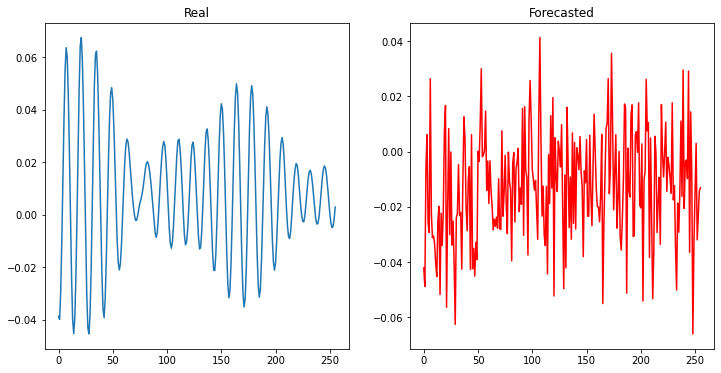

In [ ]:
y_pred = model.predict(X_train)

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(y_train[0])
plt.title("Real")


plt.subplot(1,2,2)
plt.plot(y_pred[0],'r')

plt.title("Forecasted")
plt.show()


y_pred = model.predict(X_valid)

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(y_valid[0])
plt.title("Real")

plt.subplot(1,2,2)
plt.plot(y_pred[0],'r')
plt.title("Forecasted")

plt.show()

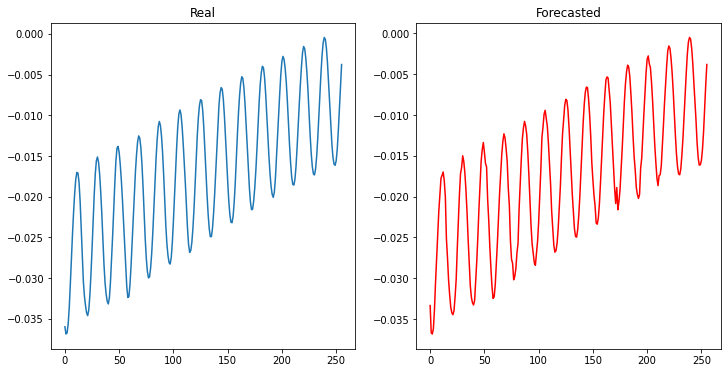

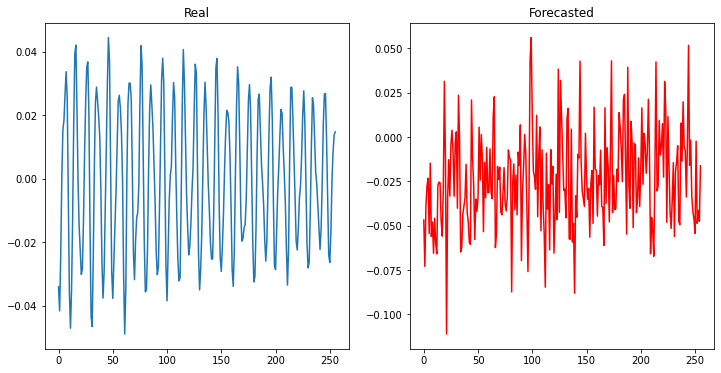

In [ ]:
y_pred = model.predict(X_train)

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(y_train[1])
plt.title("Real")


plt.subplot(1,2,2)
plt.plot(y_pred[1],'r')

plt.title("Forecasted")
plt.show()


y_pred = model.predict(X_valid)

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(y_valid[1])
plt.title("Real")

plt.subplot(1,2,2)
plt.plot(y_pred[1],'r')
plt.title("Forecasted")

plt.show()

## RNN

SimpleRNN

In [ ]:
keras.backend.clear_session()
np.random.seed(44)
tf.random.set_seed(44)

model = keras.models.Sequential()

# For RNN
# inputs: A 3D tensor, with shape [batch, timesteps, feature].
# so, [different experiment, fid, 1]

model.add(keras.layers.SimpleRNN(256,input_shape=[None,1]))

loss = keras.losses.MeanSquaredError()
optimizer = keras.optimizers.Adam(learning_rate=0.03)
model.compile(loss=loss,optimizer=optimizer)

es = keras.callbacks.EarlyStopping(patience=4)
callbacks = [es]
history = model.fit(X_train,y_train, epochs=100,
                    validation_data=(X_valid,y_valid)
                    )

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 0.0018 - val_loss: 0.7173
Epoch 2/100
1/1 [==============================] - 0s 131ms/step - loss: 0.7141 - val_loss: 0.8813
Epoch 3/100
1/1 [==============================] - 0s 138ms/step - loss: 0.8785 - val_loss: 0.9531
Epoch 4/100
1/1 [==============================] - 0s 140ms/step - loss: 0.9569 - val_loss: 0.9629
Epoch 5/100
1/1 [==============================] - 0s 132ms/step - loss: 0.9533 - val_loss: 0.9873
Epoch 6/100
1/1 [==============================] - 0s 142ms/step - loss: 0.9826 - val_loss: 0.9775
Epoch 7/100
1/1 [==============================] - 0s 123ms/step - loss: 0.9733 - val_loss: 0.9429
Epoch 8/100
1/1 [==============================] - 0s 139ms/step - loss: 0.9409 - val_loss: 0.9621
Epoch 9/100
1/1 [==============================] - 0s 127ms/step - loss: 0.9636 - val_loss: 0.9578
Epoch 10/100
1/1 [==============================] - 0s 136ms/step - loss: 0.9595 - val_loss: 0.9703
Epoch 11/100

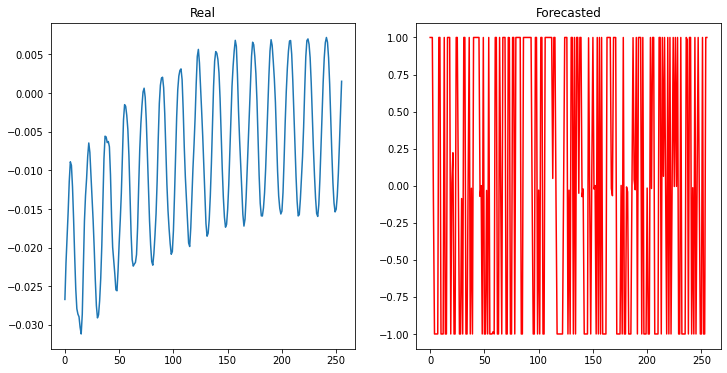

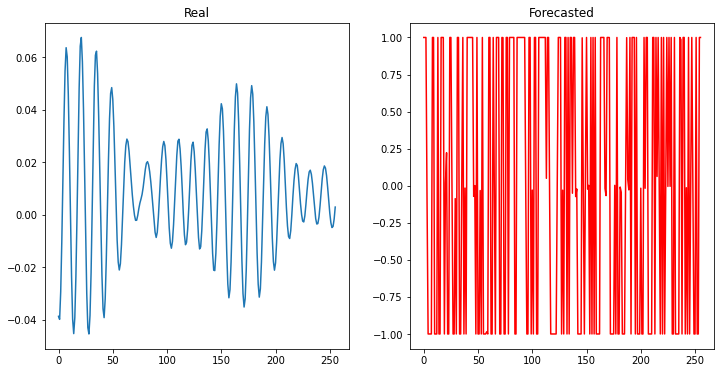

In [ ]:
y_pred = model.predict(X_train)

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(y_train[0])
plt.title("Real")


plt.subplot(1,2,2)
plt.plot(y_pred[0],'r')

plt.title("Forecasted")
plt.show()


y_pred = model.predict(X_valid)

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(y_valid[0])
plt.title("Real")

plt.subplot(1,2,2)
plt.plot(y_pred[0],'r')
plt.title("Forecasted")

plt.show()

# Deep RNN

In [ ]:
keras.backend.clear_session()
np.random.seed(44)
tf.random.set_seed(44)

model = keras.models.Sequential()

# For RNN
# inputs: A 3D tensor, with shape [batch, timesteps, feature].
# so, [different experiment, fid, 1], so, [None,1]

model.add(keras.layers.SimpleRNN(20,return_sequences=True,input_shape=[None,1]))
model.add(keras.layers.SimpleRNN(20,return_sequences=True))
model.add(keras.layers.SimpleRNN(256))

loss = keras.losses.MeanSquaredError()
optimizer = keras.optimizers.Adam(learning_rate=0.03)
model.compile(loss=loss,optimizer=optimizer)

es = keras.callbacks.EarlyStopping(patience=4)
callbacks = [es]
history = model.fit(X_train,y_train, epochs=100,
                    validation_data=(X_valid,y_valid)
                    )

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 0.0360 - val_loss: 0.5498
Epoch 2/100
1/1 [==============================] - 0s 236ms/step - loss: 0.5495 - val_loss: 0.7770
Epoch 3/100
1/1 [==============================] - 0s 241ms/step - loss: 0.7761 - val_loss: 0.8971
Epoch 4/100
1/1 [==============================] - 0s 237ms/step - loss: 0.8974 - val_loss: 0.9285
Epoch 5/100
1/1 [==============================] - 0s 241ms/step - loss: 0.9284 - val_loss: 0.9059
Epoch 6/100
1/1 [==============================] - 0s 240ms/step - loss: 0.9082 - val_loss: 0.9556
Epoch 7/100
1/1 [==============================] - 0s 239ms/step - loss: 0.9555 - val_loss: 0.9320
Epoch 8/100
1/1 [==============================] - 0s 248ms/step - loss: 0.9308 - val_loss: 0.9489
Epoch 9/100
1/1 [==============================] - 0s 230ms/step - loss: 0.9466 - val_loss: 0.9648
Epoch 10/100
1/1 [==============================] - 0s 246ms/step - loss: 0.9642 - val_loss: 0.9679
Epoch 11/100

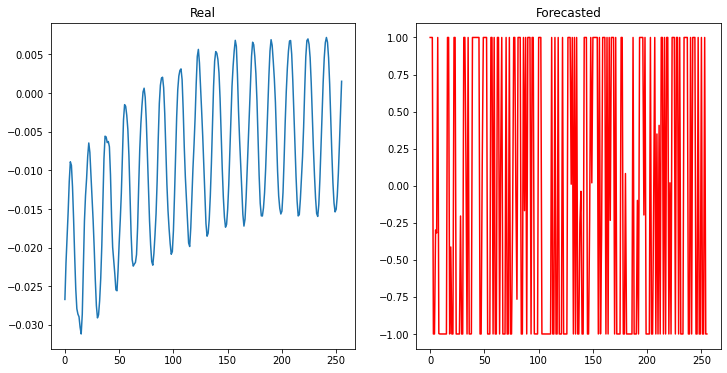

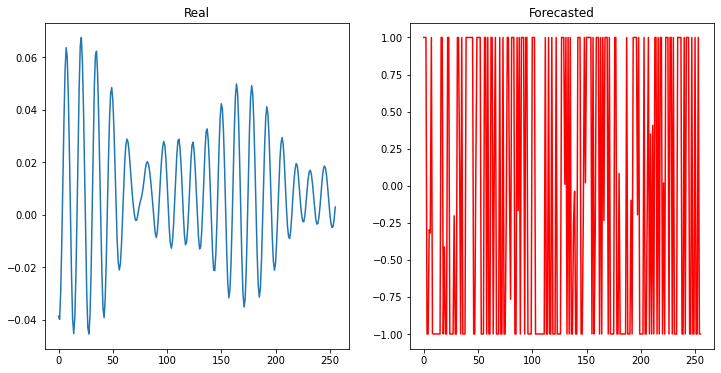

In [ ]:
y_pred = model.predict(X_train)

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(y_train[0])
plt.title("Real")


plt.subplot(1,2,2)
plt.plot(y_pred[0],'r')

plt.title("Forecasted")
plt.show()


y_pred = model.predict(X_valid)

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(y_valid[0])
plt.title("Real")

plt.subplot(1,2,2)
plt.plot(y_pred[0],'r')
plt.title("Forecasted")

plt.show()

Above is forecast at the same time.
Other possibility is that predict a point and slice this the training.

How to build this?

My guess is that it is related with dataset.

y should be a matrix containing a step ahead.
So, Y shape should be (4, 256, 256)

so,

```
initalize Y

for i in range(256+1)
  Y[...,i] = fdata[...,i:i + 256]  
```

In [ ]:
Y = np.empty((4, 256, 256))
for step_ahead in range(1, 256 + 1):
    Y[..., step_ahead - 1] = fid_datas_real[..., step_ahead:step_ahead + 256]
Y_train = Y[:2]
Y_valid = Y[2:]

In [ ]:
X_train.shape,Y_train.shape,X_valid.shape, Y_valid.shape

((2, 256, 1), (2, 256, 256), (2, 256, 1), (2, 256, 256))

In [ ]:
keras.backend.clear_session()
np.random.seed(44)
tf.random.set_seed(44)

model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20, return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(256))
])

def last_time_step_mse(Y_true, Y_pred):
    return keras.metrics.mean_squared_error(Y_true[:, -1], Y_pred[:, -1])


model.compile(loss="mse", optimizer=keras.optimizers.Adam(learning_rate=0.01), metrics=[last_time_step_mse])


In [ ]:
history = model.fit(X_train, Y_train, epochs=20,
                    validation_data=(X_valid, Y_valid))

Epoch 1/20
1/1 [==============================] - 2s 2s/step - loss: 0.0038 - last_time_step_mse: 0.0021 - val_loss: 0.0040 - val_last_time_step_mse: 0.0038
Epoch 2/20
1/1 [==============================] - 0s 124ms/step - loss: 0.0037 - last_time_step_mse: 0.0028 - val_loss: 0.0049 - val_last_time_step_mse: 0.0043
Epoch 3/20
1/1 [==============================] - 0s 138ms/step - loss: 0.0051 - last_time_step_mse: 0.0043 - val_loss: 0.0025 - val_last_time_step_mse: 0.0021
Epoch 4/20
1/1 [==============================] - 0s 127ms/step - loss: 0.0015 - last_time_step_mse: 8.6456e-04 - val_loss: 0.0025 - val_last_time_step_mse: 0.0021
Epoch 5/20
1/1 [==============================] - 0s 122ms/step - loss: 8.1906e-04 - last_time_step_mse: 5.3753e-04 - val_loss: 0.0028 - val_last_time_step_mse: 0.0022
Epoch 6/20
1/1 [==============================] - 0s 133ms/step - loss: 8.4374e-04 - last_time_step_mse: 7.2582e-04 - val_loss: 0.0030 - val_last_time_step_mse: 0.0024
Epoch 7/20
1/1 [=======

In [ ]:
y_pred = model.predict(X_train)
y_pred[:,-1][1].shape

(256,)

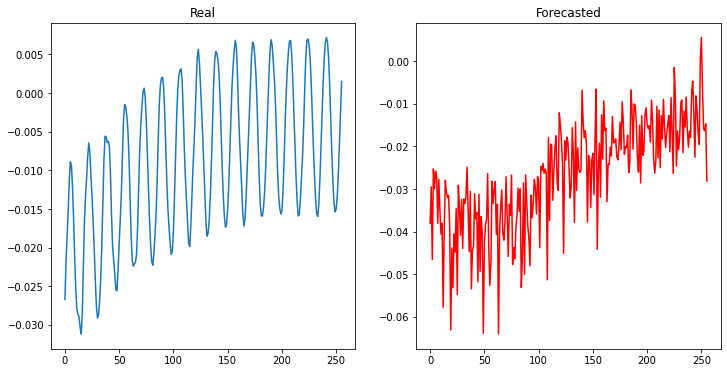

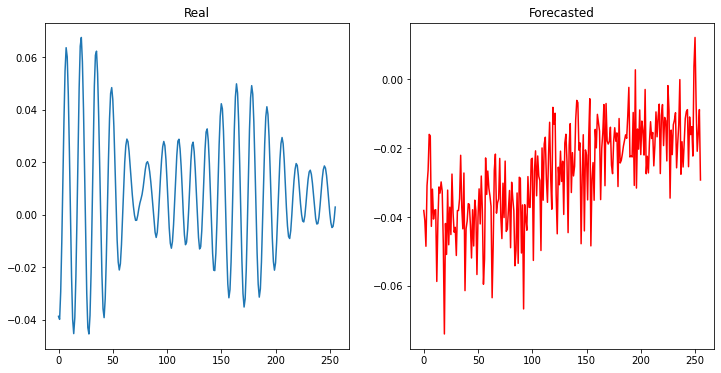

In [ ]:
y_pred = model.predict(X_train)[:,-1]

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(y_train[0])
plt.title("Real")


plt.subplot(1,2,2)
plt.plot(y_pred[0],'r')

plt.title("Forecasted")
plt.show()


y_pred = model.predict(X_valid)[:,-1]

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(y_valid[0])
plt.title("Real")

plt.subplot(1,2,2)
plt.plot(y_pred[0],'r')
plt.title("Forecasted")

plt.show()

# Colusion

Needs more data.